<a href="https://colab.research.google.com/github/ecdison/Group9_MachineLearningHC/blob/anna-sophia0/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as rnd

train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

# Make output stable across all models
np.random.seed(42)

# Only use train set. x is df without live birth. y is live birth occurence. 

# Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
df = pd.DataFrame(train_x)
df

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Partner Sperm Morphology,Stimulation used,Number of foetal sacs with fetal pulsation,Embryos Transfered,Sperm From Partner,Sperm From Donor
0,26.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
1,26.0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1.000000,1,0
2,38.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,2.000000,1,0
3,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.000000,1,0
4,38.5,6,2,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,3.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124815,26.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1.000000,1,0
124816,26.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.000000,1,0
124817,41.0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.000000,1,0
124818,26.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.164258,0,1


In [ ]:
# Define the X & y 
X = train_x['Patient Age at Treatment']
y = train_y

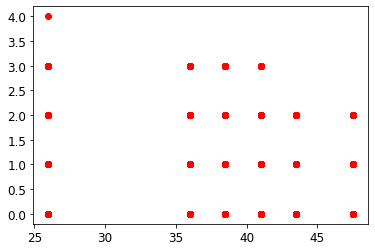

In [ ]:
# Scatter plot 
plt.scatter(X, y, c="red")
plt.show()

In [ ]:
# Perceptron function 
x_input = train_x['Patient Age at Treatment']
w_weight = [0.6, 0.4, 0.5]
threshold = 1

# Define activation function 
def step(weighted_sum):
    if weighted_sum > threshold:
        return 1
    else:
        return 0 
    
# Define perceptron function 
# Create for loop to iterate over inputs & multiply by weight, and increment our weighted sum by the result
def perceptron():
    weighted_sum = 0
    for x,w in zip(x_input, w_weight):
        weighted_sum += x*w
        print(weighted_sum)
    return step(weighted_sum)

output = perceptron()
print("output:" + str(output))

# We should see how each iteration increases our sum, which will determine the final outcome 

15.6
26.0
45.25
output:1


In [ ]:
# Perceptron classifier 
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
 
train_X = train_x
train_Y = train_y
 
sc = StandardScaler()
sc.fit(train_x)
train_x_std = sc.transform(train_X)
test_x_std = sc.transform(test_x)
 
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_x_std, train_Y)
 
y_pred = ppn.predict(test_x_std)
 
print('Accuracy: %.3f' % accuracy_score(test_y, y_pred))
print('Accuracy: %.3f' % ppn.score(test_x_std, test_y))

C:\Users\Anna-Sophia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.911
Accuracy: 0.911


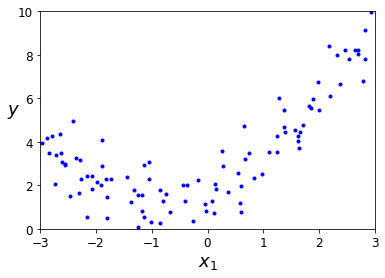

In [ ]:
# Polynomial regression - from text boox example
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
#Net Input is sum of weighted input signals

def net_input(self, X):
   weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
   return weighted_sum

In [ ]:
# Activation function is fed the net input and the unit step function is executed to determine the output.

def activation_function(self, X):
    weighted_sum = self.net_input(X)
    return np.where(weighted_sum >= 0.0, 1, 0)

In [ ]:
# Prediction is made on the basis of output of activation function

def predict(self, X):
    return self.activation_function(X)

In [ ]:
def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.n_iterations):
        for xi, expected_value in zip(X, y):
            predicted_value = self.predict(xi)
            self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
            self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1

In [ ]:
# Perceptron implementation to train binary clssification model to classify live birth occurance
import numpy as np

# Perceptron implementation

class CustomPerceptron(object):
     
    def __init__(self, n_iterations=100, random_state=1, learning_rate=0.001):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate

# Stochastic Gradient Descent
    # Weights are updated based on each training examples.
    # Learning of weights can continue for multiple iterations
    # Learning rate needs to be defined

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iterations):
            errors = 0
            for xi, expected_value in zip(X, y):
                predicted_value = self.predict(xi)
                self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
                self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1
                update = self.learning_rate * (expected_value - predicted_value)
                errors += int(update != 0.0)

# Net Input is sum of weighted input signals

    def net_input(self, X):
            weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
            return weighted_sum

# Activation function is fed the net input and the unit step function is executed to determine the output.

    def activation_function(self, X):
            weighted_sum = self.net_input(X)
            return np.where(weighted_sum >= 0.0, 1, 0)
        
# Prediction is made on the basis of output of activation function

    def predict(self, X):
        return self.activation_function(X)
     
        
# Model score is calculated based on comparison of expected value and predicted value

    def score(self, X, y):
        misclassified_data_count = 0
        for xi, target in zip(X, y):
            output = self.predict(xi)
            if(target != output):
                misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        return self.score_

In [ ]:
# Train the model using the Custom Perception algorithm
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the data set
X = train_x
y = train_y

# Instantiate CustomPerceptron

prcptrn = CustomPerceptron(n_iterations=10)

# Fit the model
prcptrn.fit(X, y)

# Score the model
prcptrn.score(test_x, test_y), prcptrn.score(X, y)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U24'), dtype('<U32')) -> None

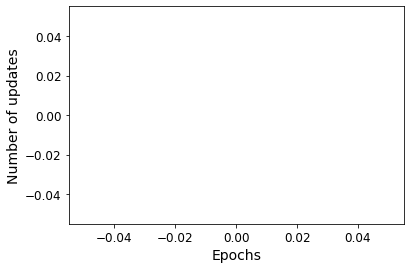

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
 
plt.show()